# Переобученная модель
Стоит задача написать модель, которая доходит до хорших метрик, но быстро начинает переобучаться

Импорт необходимых библиотек

In [9]:
%cd drive/MyDrive/YaMlProject/models/models

[Errno 2] No such file or directory: 'drive/MyDrive/YaMlProject/models/models'
/content/drive/MyDrive/YaMlProject/models/models


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
from PIL import Image
import tensorflow as tf
import torchvision as tv
from livelossplot import PlotLossesKeras

from core.datasets import get_ds

Создаем датасеты

In [11]:
train_ds, val_ds, test_ds = get_ds('repaired_data_train', 'repaired_data_test')

Пишем модель

In [ ]:
model_retrain = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3), batch_size=512),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_retrain.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (512, 30, 30, 32)         896       
                                                                 
 conv2d_1 (Conv2D)           (512, 28, 28, 64)         18496     
                                                                 
 batch_normalization (BatchN  (512, 28, 28, 64)        256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (512, 14, 14, 64)        0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (512, 12, 12, 64)         36928     
                                                                 
 average_pooling2d_1 (Averag  (512, 6, 6, 64)          0

Компиляция модели

In [ ]:
model_retrain.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())

Обучаем модель

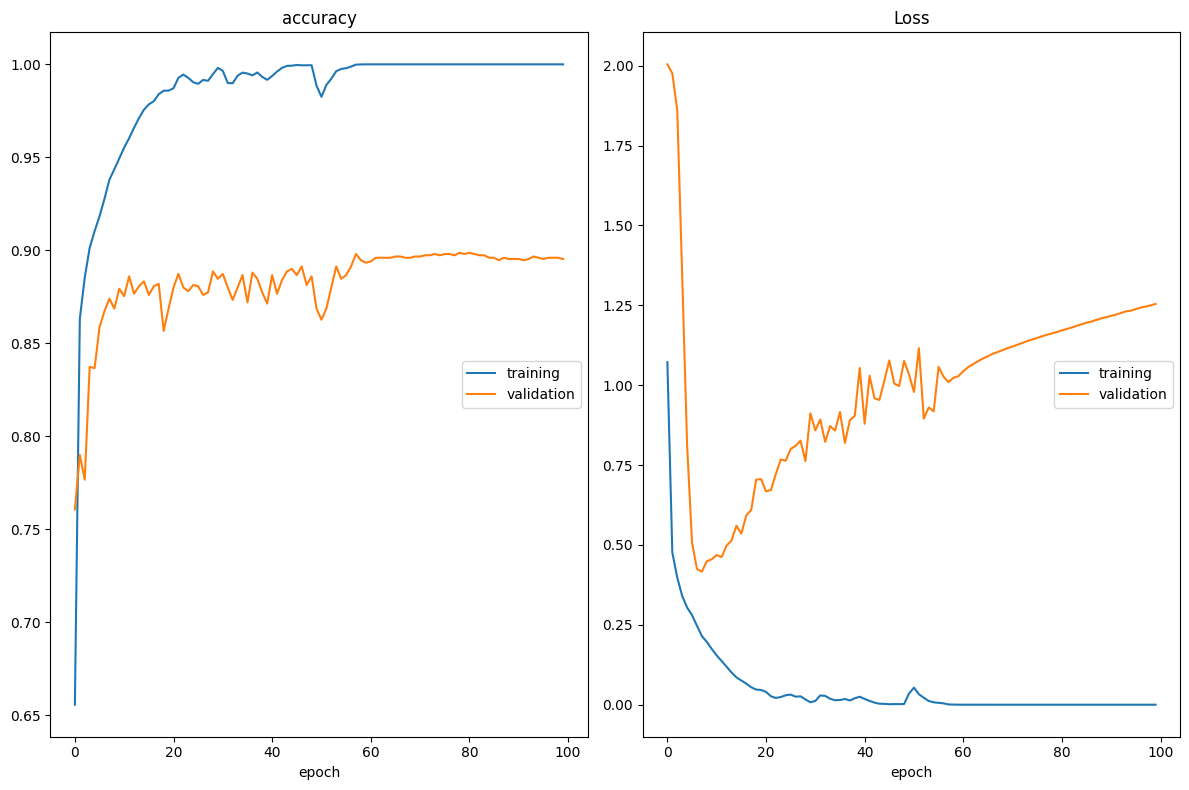

accuracy
	training         	 (min:    0.656, max:    1.000, cur:    1.000)
	validation       	 (min:    0.761, max:    0.899, cur:    0.895)
Loss
	training         	 (min:    0.000, max:    1.072, cur:    0.000)
	validation       	 (min:    0.417, max:    2.004, cur:    1.254)


In [ ]:
model_retrain.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)